## Análisis del Problema

# **Tecnológico de Costa Rica**


***IC-4213 / Inteligencia artificial***

Autores


*   **Sebastian Matey Rodriguez**
*   **Liz Iveth Salazar Salazar**
*   **Roosevelt Alejandro Pérez González**

## Entendimiento de los Datos

## Análisis del Problema

# Regresion

### Autores
   * Efrén Jiménez

## Entendimiento de los Datos

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", path)

/Volumes/macOs/rooseveltalej/Mariantonieta-IA2/.conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 60.3M/60.3M [00:09<00:00, 6.82MB/s]

Extracting files...


Path to dataset files: /Users/rooseveltalej/.cache/kagglehub/datasets/msambare/fer2013/versions/1


In [4]:
import tensorflow as tf
print(tf.config.list_physical_devices())


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import os

DATASET_PATH = path + "/train"

os.listdir(DATASET_PATH)


['happy', 'sad', 'fear', 'surprise', 'neutral', 'angry', 'disgust']

In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 766.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 132.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 7.5 MB/s eta 0:00:00


In [5]:
import tensorflow as tf

IMG_SIZE = (224, 224)
BATCH_SIZE = 16  # Reduced batch size to lessen memory usage
TRAIN_PATH = path + "/train"
TEST_PATH = path + "/test"

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_PATH,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode="rgb",
    label_mode="int",
    shuffle=True,
    validation_split=0.2,
    subset="training",
    seed=123
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_PATH,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode="rgb",
    label_mode="int",
    shuffle=True,
    validation_split=0.2,
    subset="validation",
    seed=123
)

Found 28709 files belonging to 7 classes.
Using 22968 files for training.


2025-11-30 15:37:51.650680: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-11-30 15:37:51.650719: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-11-30 15:37:51.650728: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
2025-11-30 15:37:51.650765: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-30 15:37:51.650783: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 28709 files belonging to 7 classes.
Using 5741 files for validation.


In [6]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    TEST_PATH,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    color_mode="rgb",
    label_mode="int",
    shuffle=False
)


Found 7178 files belonging to 7 classes.


In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(100).prefetch(AUTOTUNE)
val_ds = val_ds.cache().prefetch(AUTOTUNE)
test_ds = test_ds.cache().prefetch(AUTOTUNE)


In [8]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
], name="data_augmentation")


In [9]:
base_model = tf.keras.applications.MobileNetV3Large(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False  # congelar pesos


12683000/12683000 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [10]:
inputs = layers.Input(shape=(224,224,3))

# Aumento
x = data_augmentation(inputs)

# Preprocesamiento propio de MobileNetV3
x = tf.keras.applications.mobilenet_v3.preprocess_input(x)

# Pasar por el modelo base
x = base_model(x, training=False)

# Extraer características
x = layers.GlobalAveragePooling2D()(x)

# Evitar sobreajuste
x = layers.Dropout(0.3)(x)

# Capa final de clasificación
outputs = layers.Dense(7, activation="softmax")(x)

model = tf.keras.Model(inputs, outputs)


In [11]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [12]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10


2025-11-30 15:39:35.046101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1436/1436 ━━━━━━━━━━━━━━━━━━━━ 530s 364ms/step - accuracy: 0.3479 - loss: 1.6930 - val_accuracy: 0.4294 - val_loss: 1.4657
Epoch 2/10
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 415s 289ms/step - accuracy: 0.4036 - loss: 1.5578 - val_accuracy: 0.4569 - val_loss: 1.4294
Epoch 3/10
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 399s 278ms/step - accuracy: 0.4087 - loss: 1.5529 - val_accuracy: 0.4454 - val_loss: 1.4226
Epoch 4/10
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 361s 251ms/step - accuracy: 0.4158 - loss: 1.5421 - val_accuracy: 0.4628 - val_loss: 1.4140
Epoch 5/10
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 358s 249ms/step - accuracy: 0.4105 - loss: 1.5496 - val_accuracy: 0.4499 - val_loss: 1.4177
Epoch 6/10
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 338s 235ms/step - accuracy: 0.4112 - loss: 1.5434 - val_accuracy: 0.4593 - val_loss: 1.4097
Epoch 7/10
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 340s 237ms/step - accuracy: 0.4144 - loss: 1.5368 - val_accuracy: 0.4590 - val_loss: 1.4068
Epoch 8/10
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 349s 243ms/step - accuracy: 0.4

In [13]:
base_model.trainable = True

# Solo fine-tune las últimas ~120 capas
for layer in base_model.layers[:200]:
    layer.trainable = False


In [14]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [15]:
history_ft = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 353s 242ms/step - accuracy: 0.4239 - loss: 1.5039 - val_accuracy: 0.4799 - val_loss: 1.3842
Epoch 2/10
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 302s 210ms/step - accuracy: 0.4244 - loss: 1.5010 - val_accuracy: 0.4801 - val_loss: 1.3831
Epoch 3/10
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 283s 197ms/step - accuracy: 0.4309 - loss: 1.4958 - val_accuracy: 0.4799 - val_loss: 1.3821
Epoch 4/10
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 274s 191ms/step - accuracy: 0.4309 - loss: 1.4965 - val_accuracy: 0.4804 - val_loss: 1.3812
Epoch 5/10
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 298s 208ms/step - accuracy: 0.4282 - loss: 1.4953 - val_accuracy: 0.4802 - val_loss: 1.3805
Epoch 6/10
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 332s 231ms/step - accuracy: 0.4336 - loss: 1.4852 - val_accuracy: 0.4818 - val_loss: 1.3800
Epoch 7/10
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 434s 302ms/step - accuracy: 0.4301 - loss: 1.4940 - val_accuracy: 0.4806 - val_loss: 1.3795
Epoch 8/10
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 315s 219ms/step - ac

In [16]:
test_loss, test_acc = model.evaluate(test_ds)
print("Test accuracy:", test_acc)

449/449 ━━━━━━━━━━━━━━━━━━━━ 46s 101ms/step - accuracy: 0.4742 - loss: 1.3814
Test accuracy: 0.47422680258750916


In [21]:
model.save("emotion_model.keras")


In [24]:
!pip install pillow


In [29]:
from PIL import Image
print(Image)

<module 'PIL.Image' from '/Volumes/macOs/rooseveltalej/Mariantonieta-IA2/.conda/lib/python3.10/site-packages/PIL/Image.py'>


Modelo cargado correctamente.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


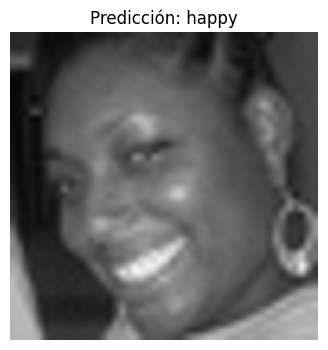

Probabilidades por clase:
angry: 0.1257
disgust: 0.0013
fear: 0.0607
happy: 0.5726
neutral: 0.1606
sad: 0.0521
surprise: 0.0269


In [41]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
# ---------------------------
# 1. Cargar el modelo
# ---------------------------
model = tf.keras.models.load_model("emotion_model.keras")
print("Modelo cargado correctamente.")

# Lista de emociones según tus carpetas
CLASS_NAMES = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

# ---------------------------
# 2. Función para preprocesar la imagen
# ---------------------------
def load_and_preprocess(img_path, img_size=(224, 224)):
    img = Image.open(img_path).convert("RGB").resize(img_size)
    img_array = img_to_array(img)

    # Expandir a batch size = 1
    img_array = np.expand_dims(img_array, axis=0)

    # Preprocesamiento de MobileNetV3
    img_array = tf.keras.applications.mobilenet_v3.preprocess_input(img_array)

    return img_array, img


# ---------------------------
# 3. Probar con una imagen
# ---------------------------

img_path = "./test3.jpg"  # <- CAMBIA ESTA LÍNEA

img_array, img_display = load_and_preprocess(img_path)

# ---------------------------
# 4. Predicción
# ---------------------------
pred = model.predict(img_array)
emotion_idx = np.argmax(pred)
emotion = CLASS_NAMES[emotion_idx]

# ---------------------------
# 5. Mostrar resultado
# ---------------------------
plt.figure(figsize=(4,4))
plt.imshow(img_display)
plt.axis("off")
plt.title(f"Predicción: {emotion}")
plt.show()

print("Probabilidades por clase:")
for clase, p in zip(CLASS_NAMES, pred[0]):
    print(f"{clase}: {p:.4f}")


## Exploración de los Datos

# Procesamiento de las imagenes

## Modelo de Deep Learning

## Resultados